In [1]:
import pandas as pd
import h5py
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
def create_dataframes_for_combinations(param_combinations, num_simulations):
    dataframes = {}

    for epsilon, N_0_squared in param_combinations:
        file_path = f"../PythonFiles/H5Data/runfile_eps_{epsilon:.2f}_n0_{N_0_squared:.2f}.h5"
        with h5py.File(file_path, 'r') as hf:
            runs_data = []

            for run_id in range(num_simulations):
                run_group = hf[f"run_{run_id}"]

                run_data = {
                    "run_id": run_id,
                    "epsilon": epsilon,
                    "N_0_squared": N_0_squared,
                    "phi_e_history": run_group["phi_e_history"][:],
                    "phi_plus_history": run_group["phi_plus_history"][:],
                    "U_history": run_group["U_history"][:],
                    "R_vals": run_group["R_vals"][:],
                    "k_e_psi_e_vals": run_group["k_e_psi_e_vals"][:],
                    "k_e_b_e_vals": run_group["k_e_b_e_vals"][:],
                    "k_e_psi_plus_vals": run_group["k_e_psi_plus_vals"][:],
                    "k_e_b_plus_vals": run_group["k_e_b_plus_vals"][:],
                    "heat_flux_psi_e_b_e_vals": run_group["heat_flux_psi_e_b_e_vals"][:],
                    "heat_flux_psi_e_b_plus_vals": run_group["heat_flux_psi_e_b_plus_vals"][:],
                    "b_e_psi_plus_vals": run_group["b_e_psi_plus_vals"][:],
                    "b_e_b_plus_vals": run_group["b_e_b_plus_vals"][:],
                    "psi_plus_b_plus_vals": run_group["psi_plus_b_plus_vals"][:],
                    "eta_batch": run_group["eta_batch"][:],
                    "reversals": run_group["reversals"][:],
                    "durations": run_group["durations"][:]
                }

                runs_data.append(run_data)

            df_name = f"df_eps_{epsilon:.2f}_n0_{N_0_squared:.2f}"
            dataframes[df_name] = pd.DataFrame(runs_data)

    return dataframes


In [3]:
param_combinations = [(eps, n0) for eps in np.linspace(0.06, 0.24, 10) for n0 in np.linspace(150, 640, 10)]
param_combinations = [(.06, 150)] #TAKEOUT 
num_simulations = 1

In [73]:
#The following code definitely needs editing. it cannot handle 2000 run times. 

In [74]:
dataframes = create_dataframes_for_combinations([(0.06, 204.44444444444446)], num_simulations)

In [75]:
epsilon_values = np.linspace(0.06, 0.24, 10)
N_0_squared_values = np.linspace(150, 640, 10)
combo_list = list(itertools.product(epsilon_values, N_0_squared_values))

In [9]:
dataframes = create_dataframes_for_combinations([(0.06, 150.0)], num_simulations)
df0 = dataframes["df_eps_0.06_n0_150.00"]
len(df0['durations'][0]) #TAKEOUT

27

In [77]:
dataframes = create_dataframes_for_combinations([(0.06, 204.44444444444446)], num_simulations)
df1 = dataframes["df_eps_0.06_n0_204.44"]

In [78]:
dataframes = create_dataframes_for_combinations([(0.06, 258.8888888888889)], num_simulations)
df2 = dataframes["df_eps_0.06_n0_258.89"]

In [79]:
dataframes = create_dataframes_for_combinations([(0.06, 313.3333333333333)], num_simulations)
df3 = dataframes["df_eps_0.06_n0_313.33"]

In [80]:
dataframes = create_dataframes_for_combinations([(0.06, 367.77777777777777)], num_simulations)
df4 = dataframes["df_eps_0.06_n0_367.78"]

In [81]:
dataframes = create_dataframes_for_combinations([(0.06, 422.22222222222223)], num_simulations)
df5 = dataframes["df_eps_0.06_n0_422.22"]

In [82]:
dataframes = create_dataframes_for_combinations([(0.06, 476.66666666666663)], num_simulations)
df6 = dataframes["df_eps_0.06_n0_476.67"]

In [83]:
dataframes = create_dataframes_for_combinations([(0.06, 531.1111111111111)], num_simulations)
df7 = dataframes["df_eps_0.06_n0_531.11"]

In [84]:
dataframes = create_dataframes_for_combinations([(0.06, 585.5555555555555)], num_simulations)
df8 = dataframes["df_eps_0.06_n0_585.56"]

In [85]:
dataframes = create_dataframes_for_combinations([(0.06, 640.0)], num_simulations)
df9 = dataframes["df_eps_0.06_n0_640.00"]

In [86]:
dataframes = create_dataframes_for_combinations([(0.08, 150.0)], num_simulations)
df10 = dataframes["df_eps_0.08_n0_150.00"]

In [87]:
dataframes = create_dataframes_for_combinations([(0.08, 204.44444444444446)], num_simulations)
df11 = dataframes["df_eps_0.08_n0_204.44"]

In [88]:
dataframes = create_dataframes_for_combinations([(0.08, 258.8888888888889)], num_simulations)
df12 = dataframes["df_eps_0.08_n0_258.89"]

In [89]:
dataframes = create_dataframes_for_combinations([(0.08, 313.3333333333333)], num_simulations)
df13 = dataframes["df_eps_0.08_n0_313.33"]

In [90]:
dataframes = create_dataframes_for_combinations([(0.08, 367.77777777777777)], num_simulations)
df14 = dataframes["df_eps_0.08_n0_367.78"]

In [91]:
dataframes = create_dataframes_for_combinations([(0.08, 422.22222222222223)], num_simulations)
df15 = dataframes["df_eps_0.08_n0_422.22"]

In [92]:
dataframes = create_dataframes_for_combinations([(0.08, 476.66666666666663)], num_simulations)
df16 = dataframes["df_eps_0.08_n0_476.67"]

In [93]:
dataframes = create_dataframes_for_combinations([(0.08, 531.1111111111111)], num_simulations)
df17 = dataframes["df_eps_0.08_n0_531.11"]

In [94]:
dataframes = create_dataframes_for_combinations([(0.08, 585.5555555555555)], num_simulations)
df18 = dataframes["df_eps_0.08_n0_585.56"]

In [95]:
dataframes = create_dataframes_for_combinations([(0.08, 640.0)], num_simulations)
df19 = dataframes["df_eps_0.08_n0_640.00"]

In [96]:
dataframes = create_dataframes_for_combinations([(0.1, 150.0)], num_simulations)
df20 = dataframes["df_eps_0.10_n0_150.00"]

In [97]:
dataframes = create_dataframes_for_combinations([(0.1, 204.44444444444446)], num_simulations)
df21 = dataframes["df_eps_0.10_n0_204.44"]

In [98]:
dataframes = create_dataframes_for_combinations([(0.1, 258.8888888888889)], num_simulations)
df22 = dataframes["df_eps_0.10_n0_258.89"]

In [99]:
dataframes = create_dataframes_for_combinations([(0.1, 313.3333333333333)], num_simulations)
df23 = dataframes["df_eps_0.10_n0_313.33"]

In [100]:
dataframes = create_dataframes_for_combinations([(0.1, 367.77777777777777)], num_simulations)
df24 = dataframes["df_eps_0.10_n0_367.78"]

In [101]:
dataframes = create_dataframes_for_combinations([(0.1, 422.22222222222223)], num_simulations)
df25 = dataframes["df_eps_0.10_n0_422.22"]

In [102]:
dataframes = create_dataframes_for_combinations([(0.1, 476.66666666666663)], num_simulations)
df26 = dataframes["df_eps_0.10_n0_476.67"]

In [103]:
dataframes = create_dataframes_for_combinations([(0.1, 531.1111111111111)], num_simulations)
df27 = dataframes["df_eps_0.10_n0_531.11"]

In [104]:
dataframes = create_dataframes_for_combinations([(0.1, 585.5555555555555)], num_simulations)
df28 = dataframes["df_eps_0.10_n0_585.56"]

In [105]:
dataframes = create_dataframes_for_combinations([(0.1, 640.0)], num_simulations)
df29 = dataframes["df_eps_0.10_n0_640.00"]

In [106]:
dataframes = create_dataframes_for_combinations([(0.12, 150.0)], num_simulations)
df30 = dataframes["df_eps_0.12_n0_150.00"]

In [107]:
dataframes = create_dataframes_for_combinations([(0.12, 204.44444444444446)], num_simulations)
df31 = dataframes["df_eps_0.12_n0_204.44"]

In [108]:
dataframes = create_dataframes_for_combinations([(0.12, 258.8888888888889)], num_simulations)
df32 = dataframes["df_eps_0.12_n0_258.89"]

In [109]:
dataframes = create_dataframes_for_combinations([(0.12, 313.3333333333333)], num_simulations)
df33 = dataframes["df_eps_0.12_n0_313.33"]

In [110]:
dataframes = create_dataframes_for_combinations([(0.12, 367.77777777777777)], num_simulations)
df34 = dataframes["df_eps_0.12_n0_367.78"]

In [111]:
dataframes = create_dataframes_for_combinations([(0.12, 422.22222222222223)], num_simulations)
df35 = dataframes["df_eps_0.12_n0_422.22"]

In [112]:
dataframes = create_dataframes_for_combinations([(0.12, 476.66666666666663)], num_simulations)
df36 = dataframes["df_eps_0.12_n0_476.67"]

In [113]:
dataframes = create_dataframes_for_combinations([(0.12, 531.1111111111111)], num_simulations)
df37 = dataframes["df_eps_0.12_n0_531.11"]

In [114]:
dataframes = create_dataframes_for_combinations([(0.12, 585.5555555555555)], num_simulations)
df38 = dataframes["df_eps_0.12_n0_585.56"]

In [115]:
dataframes = create_dataframes_for_combinations([(0.12, 640.0)], num_simulations)
df39 = dataframes["df_eps_0.12_n0_640.00"]

In [116]:
dataframes = create_dataframes_for_combinations([(0.14, 150.0)], num_simulations)
df40 = dataframes["df_eps_0.14_n0_150.00"]

In [117]:
dataframes = create_dataframes_for_combinations([(0.14, 204.44444444444446)], num_simulations)
df41 = dataframes["df_eps_0.14_n0_204.44"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.14, 258.8888888888889)], num_simulations)
df42 = dataframes["df_eps_0.14_n0_258.89"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.14, 313.3333333333333)], num_simulations)
df43 = dataframes["df_eps_0.14_n0_313.33"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.14, 367.77777777777777)], num_simulations)
df44 = dataframes["df_eps_0.14_n0_367.78"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.14, 422.22222222222223)], num_simulations)
df45 = dataframes["df_eps_0.14_n0_422.22"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.14, 476.66666666666663)], num_simulations)
df46 = dataframes["df_eps_0.14_n0_476.67"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.14, 531.1111111111111)], num_simulations)
df47 = dataframes["df_eps_0.14_n0_531.11"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.14, 585.5555555555555)], num_simulations)
df48 = dataframes["df_eps_0.14_n0_585.56"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.14, 640.0)], num_simulations)
df49 = dataframes["df_eps_0.14_n0_640.00"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.16, 150.0)], num_simulations)
df50 = dataframes["df_eps_0.16_n0_150.00"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.16, 204.44444444444446)], num_simulations)
df51 = dataframes["df_eps_0.16_n0_204.44"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.16, 258.8888888888889)], num_simulations)
df52 = dataframes["df_eps_0.16_n0_258.89"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.16, 313.3333333333333)], num_simulations)
df53 = dataframes["df_eps_0.16_n0_313.33"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.16, 367.77777777777777)], num_simulations)
df54 = dataframes["df_eps_0.16_n0_367.78"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.16, 422.22222222222223)], num_simulations)
df55 = dataframes["df_eps_0.16_n0_422.22"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.16, 476.66666666666663)], num_simulations)
df56 = dataframes["df_eps_0.16_n0_476.67"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.16, 531.1111111111111)], num_simulations)
df57 = dataframes["df_eps_0.16_n0_531.11"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.16, 585.5555555555555)], num_simulations)
df58 = dataframes["df_eps_0.16_n0_585.56"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.16, 640.0)], num_simulations)
df59 = dataframes["df_eps_0.16_n0_640.00"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.18, 150.0)], num_simulations)
df60 = dataframes["df_eps_0.18_n0_150.00"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.18, 204.44444444444446)], num_simulations)
df61 = dataframes["df_eps_0.18_n0_204.44"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.18, 258.8888888888889)], num_simulations)
df62 = dataframes["df_eps_0.18_n0_258.89"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.18, 313.3333333333333)], num_simulations)
df63 = dataframes["df_eps_0.18_n0_313.33"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.18, 367.77777777777777)], num_simulations)
df64 = dataframes["df_eps_0.18_n0_367.78"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.18, 422.22222222222223)], num_simulations)
df65 = dataframes["df_eps_0.18_n0_422.22"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.18, 476.66666666666663)], num_simulations)
df66 = dataframes["df_eps_0.18_n0_476.67"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.18, 531.1111111111111)], num_simulations)
df67 = dataframes["df_eps_0.18_n0_531.11"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.18, 585.5555555555555)], num_simulations)
df68 = dataframes["df_eps_0.18_n0_585.56"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.18, 640.0)], num_simulations)
df69 = dataframes["df_eps_0.18_n0_640.00"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.2, 150.0)], num_simulations)
df70 = dataframes["df_eps_0.20_n0_150.00"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.2, 204.44444444444446)], num_simulations)
df71 = dataframes["df_eps_0.20_n0_204.44"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.2, 258.8888888888889)], num_simulations)
df72 = dataframes["df_eps_0.20_n0_258.89"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.2, 313.3333333333333)], num_simulations)
df73 = dataframes["df_eps_0.20_n0_313.33"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.2, 367.77777777777777)], num_simulations)
df74 = dataframes["df_eps_0.20_n0_367.78"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.2, 422.22222222222223)], num_simulations)
df75 = dataframes["df_eps_0.20_n0_422.22"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.2, 476.66666666666663)], num_simulations)
df76 = dataframes["df_eps_0.20_n0_476.67"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.2, 531.1111111111111)], num_simulations)
df77 = dataframes["df_eps_0.20_n0_531.11"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.2, 585.5555555555555)], num_simulations)
df78 = dataframes["df_eps_0.20_n0_585.56"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.2, 640.0)], num_simulations)
df79 = dataframes["df_eps_0.20_n0_640.00"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.22, 150.0)], num_simulations)
df80 = dataframes["df_eps_0.22_n0_150.00"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.22, 204.44444444444446)], num_simulations)
df81 = dataframes["df_eps_0.22_n0_204.44"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.22, 258.8888888888889)], num_simulations)
df82 = dataframes["df_eps_0.22_n0_258.89"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.22, 313.3333333333333)], num_simulations)
df83 = dataframes["df_eps_0.22_n0_313.33"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.22, 367.77777777777777)], num_simulations)
df84 = dataframes["df_eps_0.22_n0_367.78"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.22, 422.22222222222223)], num_simulations)
df85 = dataframes["df_eps_0.22_n0_422.22"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.22, 476.66666666666663)], num_simulations)
df86 = dataframes["df_eps_0.22_n0_476.67"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.22, 531.1111111111111)], num_simulations)
df87 = dataframes["df_eps_0.22_n0_531.11"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.22, 585.5555555555555)], num_simulations)
df88 = dataframes["df_eps_0.22_n0_585.56"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.22, 640.0)], num_simulations)
df89 = dataframes["df_eps_0.22_n0_640.00"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.24, 150.0)], num_simulations)
df90 = dataframes["df_eps_0.24_n0_150.00"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.24, 204.44444444444446)], num_simulations)
df91 = dataframes["df_eps_0.24_n0_204.44"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.24, 258.8888888888889)], num_simulations)
df92 = dataframes["df_eps_0.24_n0_258.89"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.24, 313.3333333333333)], num_simulations)
df93 = dataframes["df_eps_0.24_n0_313.33"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.24, 367.77777777777777)], num_simulations)
df94 = dataframes["df_eps_0.24_n0_367.78"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.24, 422.22222222222223)], num_simulations)
df95 = dataframes["df_eps_0.24_n0_422.22"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.24, 476.66666666666663)], num_simulations)
df96 = dataframes["df_eps_0.24_n0_476.67"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.24, 531.1111111111111)], num_simulations)
df97 = dataframes["df_eps_0.24_n0_531.11"]

In [ ]:
dataframes = create_dataframes_for_combinations([(0.24, 585.5555555555555)], num_simulations)
df98 = dataframes["df_eps_0.24_n0_585.56"]

In [7]:
dataframes = create_dataframes_for_combinations([(0.24, 640.0)], num_simulations)
df99 = dataframes["df_eps_0.24_n0_640.00"]

In [8]:
df99.head()

,run_id,epsilon,N_0_squared,phi_e_history,phi_plus_history,U_history,R_vals,k_e_psi_e_vals,k_e_b_e_vals,k_e_psi_plus_vals,k_e_b_plus_vals,heat_flux_psi_e_b_e_vals,heat_flux_psi_e_b_plus_vals,b_e_psi_plus_vals,b_e_b_plus_vals,psi_plus_b_plus_vals,eta_batch,reversals,durations
0,0,0.24,640.0,"[[9.604434866505035e-05, 0.0], [0.000639351944...","[[0.0, 0.0], [-5.32415376993389e-10, 0.0], [-4...","[0.009999000000000001, 0.00999800008847442, 0....","[0.0, -1.152558125970335e-08, 7.08631108024836...","[9.22451691049376e-09, 4.087709091422192e-07, ...","[0.0, 5.369895284110732e-06, 0.000314739761584...","[0.0, 2.8346613365901256e-19, 1.66115992727424...","[0.0, 0.0, 1.7966428307850027e-13, 1.345559130...","[0.0, -1.4815724677802498e-06, 9.1099929260091...","[0.0, 0.0, -2.1765723527077836e-10, 2.37600684...","[0.0, 1.2337679904830705e-12, 7.23071973916603...","[0.0, -0.0, -7.51980675425488e-09, -1.95649264...","[0.0, -0.0, -1.7275737535991383e-15, -4.506874...","[[0.09238624730127538], [0.5227066849753066], ...","[40.782022891011444, 70.81203790601896, 86.257...","[40.782022891011444, 30.030015015007514, 15.44..."


In [9]:
list(df99['reversals'][0])

[40.782022891011444,
 70.81203790601896,
 86.25704562852282,
 122.29106364553182,
 144.38707469353736,
 154.85107992553995,
 291.46214823107414,
 304.6151548075774,
 336.9561709780855,
 342.41617370808683,
 347.74917637458816,
 373.0721890360945,
 448.7752268876134,
 543.4712742356371,
 552.1662785831393,
 595.34430017215,
 600.3743026871514,
 641.2603231301615,
 721.1913630956816,
 731.217368108684,
 755.7063803531902,
 872.0624385312193,
 875.7584403792201,
 887.7284463642231,
 943.5534742767371,
 955.38548019274,
 965.2984851492425,
 996.7445008722505,
 1003.8255044127523,
 1080.5995427997714,
 1151.3615781807891,
 1213.9906094953046,
 1236.2266206133104,
 1278.914641957321,
 1359.231682115841,
 1377.3186911593455,
 1401.0497030248514,
 1444.7687248843624,
 1464.9277349638676,
 1486.0177455088728,
 1542.774773887387,
 1598.528801764401,
 1698.532851766426,
 1737.5768712884355,
 1759.7088823544411,
 1843.446924223462,
 1861.2279331139666,
 1929.9679674839838,
 1958.3209816604908]

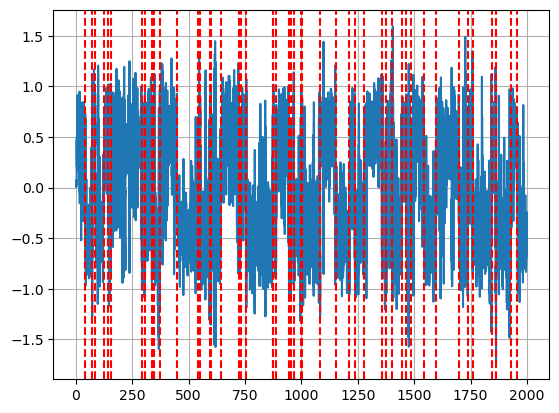

In [13]:
plt.plot(np.linspace(0, 2000, 2000000),list(df99['U_history'][0]))
for i in list(df99['reversals'][0]):
    plt.axvline(x=int(i), color = 'r', linestyle = '--', label = f'x={i}')
plt.grid()
plt.show()